<a href="https://colab.research.google.com/github/YoshiCity96/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Описание задачи
Задача заключается в прогнозировании оттока клиентов банка (Churn prediction). Это задача бинарной классификации:
Целевая переменная: Exited (1 — клиент ушел, 0 — остался).
Объекты: Клиенты банка.
Признаки: Кредитный рейтинг, страна проживания, пол, возраст, баланс, количество продуктов, наличие кредитной карты, активность, зарплата.
Цель: Построить модель, которая определит потенциально уходящих клиентов, чтобы банк мог предпринять меры по их удержанию.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. ЗАГРУЗКА ФАЙЛА
try:
    df = pd.read_csv('Churn.csv')
    print("--> Файл 'Churn.csv' успешно загружен!")
except FileNotFoundError:
    print("Файл 'Churn.csv' не найден.")

# 2. ПРИВЕДЕНИЕ К ЕДИНОМУ ИМЕНИ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
possible_targets = ['Churn', 'churn', 'Target', 'target', 'Exited']
found_target = False
for name in possible_targets:
    if name in df.columns:
        if name != 'Exited':
            df.rename(columns={name: 'Exited'}, inplace=True)
        found_target = True
        print(f"--> Целевая колонка найдена: '{name}' (переименована в 'Exited')")
        break

if not found_target:
    print("Не найдена колонка с целевой переменной!")
    print(df.columns.tolist())

# 3. УДАЛЕНИЕ ЛИШНЕГО
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname', 'id', 'ID']
df_clean = df.drop(cols_to_drop, axis=1, errors='ignore')
print(f"--> Удалены лишние колонки. Осталось колонок: {df_clean.shape[1]}")

# 4. КОДИРОВАНИЕ КАТЕГОРИЙ
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
if len(cat_cols) > 0:
    print(f"--> Кодируем текстовые признаки: {cat_cols}")
    df_encoded = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)
else:
    df_encoded = df_clean.copy()

# 5. ЗАПОЛНЕНИЕ ПРОПУСКОВ И НОРМАЛИЗАЦИЯ
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

# Заполняем пустоты (NaN) средним значением
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 6. РАЗБИЕНИЕ НА TRAIN / TEST
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nДанные полностью готовы.")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

--> Файл 'Churn.csv' успешно загружен!
--> Целевая колонка найдена: 'churn' (переименована в 'Exited')
--> Удалены лишние колонки. Осталось колонок: 15
--> Кодируем текстовые признаки: ['gender']

Данные полностью готовы.
Обучающая выборка: (136595, 14)
Тестовая выборка: (34149, 14)


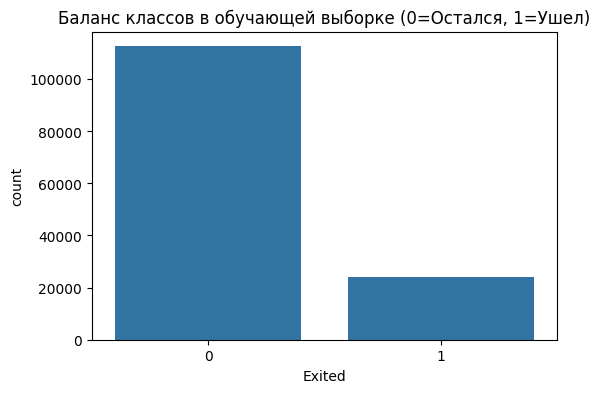

Количество объектов каждого класса: {np.int64(0): np.int64(112550), np.int64(1): np.int64(24045)}
Доля класса 1 (ушедшие): 17.60%


In [13]:

plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Баланс классов в обучающей выборке (0=Остался, 1=Ушел)")
plt.show()


unique, counts = np.unique(y_train, return_counts=True)
print("Количество объектов каждого класса:", dict(zip(unique, counts)))
print(f"Доля класса 1 (ушедшие): {counts[1] / sum(counts):.2%}")

Начинаем подбор K...
K=1 проверено...
K=2 проверено...
K=3 проверено...
K=4 проверено...
K=5 проверено...
K=6 проверено...
K=7 проверено...
K=8 проверено...
K=9 проверено...
K=10 проверено...
K=11 проверено...
K=12 проверено...
K=13 проверено...
K=14 проверено...
K=15 проверено...
K=16 проверено...
K=17 проверено...
K=18 проверено...
K=19 проверено...
K=20 проверено...


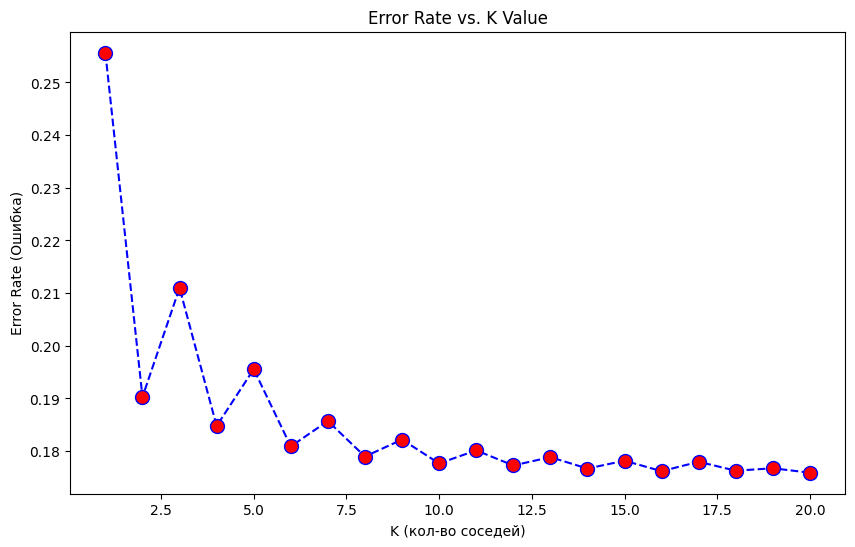

In [14]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

print("Начинаем подбор K...")
# Ищем лучшее K от 1 до 20
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(f"K={i} проверено...")

# Рисуем график ошибки
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K (кол-во соседей)')
plt.ylabel('Error Rate (Ошибка)')
plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


best_k = 20

print(f"Обучаем финальный KNN с {best_k} соседями...")
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_knn = knn_final.predict(X_test)

print("\n--- Результаты KNN ---")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Обучаем финальный KNN с 20 соседями...

--- Результаты KNN ---
[[27974   164]
 [ 5843   168]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     28138
           1       0.51      0.03      0.05      6011

    accuracy                           0.82     34149
   macro avg       0.67      0.51      0.48     34149
weighted avg       0.77      0.82      0.75     34149



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. Логистическая регрессия
print("Обучаем Логистическую регрессию...")
logmodel = LogisticRegression(random_state=42, max_iter=1000)
logmodel.fit(X_train, y_train)
pred_log = logmodel.predict(X_test)

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, pred_log))

# 2. Случайный лес (Random Forest)
print("Обучаем Случайный Лес...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Report ---")
print(classification_report(y_test, pred_rf))

Обучаем Логистическую регрессию...

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     28138
           1       0.60      0.00      0.00      6011

    accuracy                           0.82     34149
   macro avg       0.71      0.50      0.45     34149
weighted avg       0.78      0.82      0.74     34149

Обучаем Случайный Лес...

--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     28138
           1       0.52      0.11      0.18      6011

    accuracy                           0.83     34149
   macro avg       0.68      0.54      0.54     34149
weighted avg       0.78      0.83      0.77     34149



In [17]:
print("Обучаем Сбалансированный Случайный Лес...")
# Добавляем class_weight='balanced'
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)
pred_rf_bal = rf_balanced.predict(X_test)

print("\n--- Balanced Random Forest Report ---")
print(classification_report(y_test, pred_rf_bal))


Обучаем Сбалансированный Случайный Лес...

--- Balanced Random Forest Report ---
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     28138
           1       0.54      0.08      0.14      6011

    accuracy                           0.83     34149
   macro avg       0.68      0.53      0.52     34149
weighted avg       0.78      0.83      0.77     34149



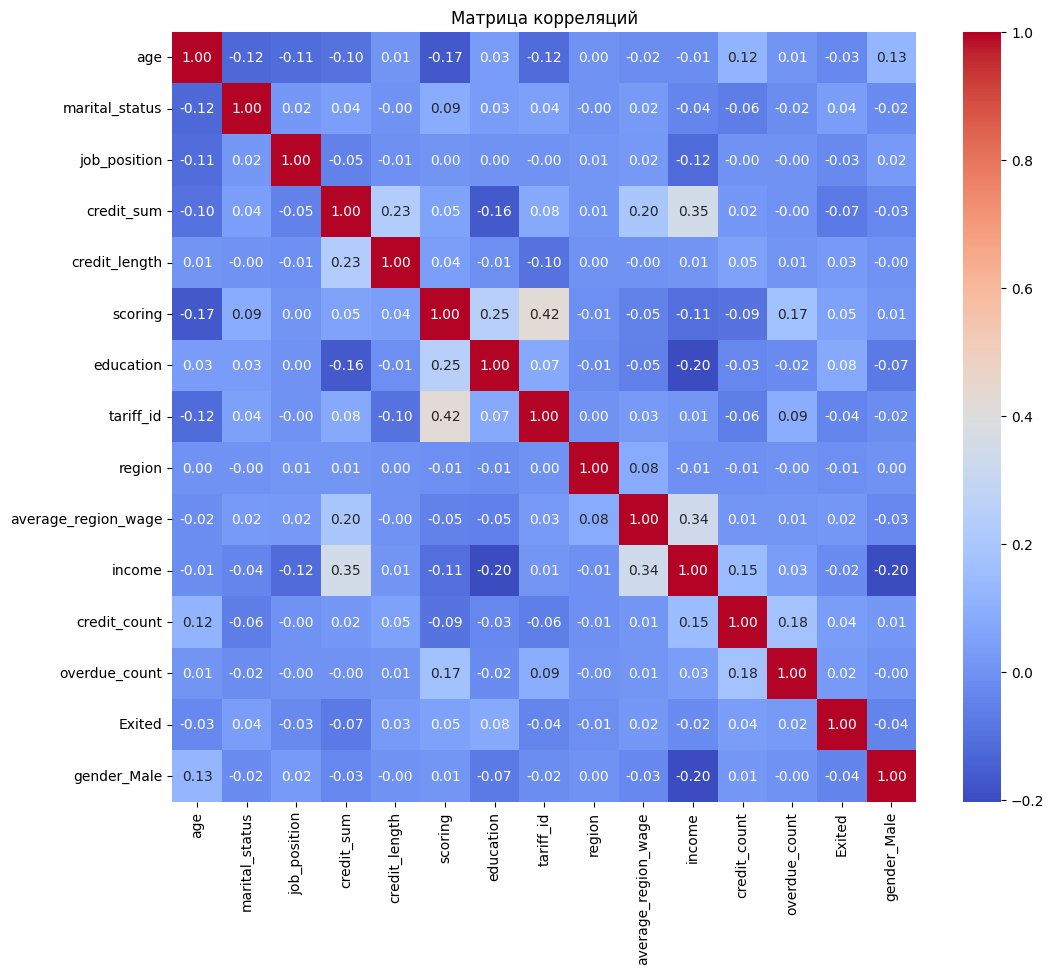

Сильно коррелированных признаков (corr > 0.9) не найдено. Удалять нечего.


In [18]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()


corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

if len(to_drop) > 0:
    print("Найдены сильно коррелированные признаки для удаления:", to_drop)

else:
    print("Сильно коррелированных признаков (corr > 0.9) не найдено. Удалять нечего.")

Общие выводы по лабораторной работе:
1. Данные: Был выбран датасет банковского оттока (~170 000 записей). Данные были успешно предобработаны: пропуски заполнены средними значениями, категориальные признаки закодированы, числовые — нормализованы.
2. Анализ признаков: Матрица корреляций показала, что целевая переменная Exited слабо коррелирует с остальными признаками (максимальная корреляция около 0.13 с возрастом и полом). Сильно коррелированных между собой признаков (мультиколлинеарности > 0.9) не обнаружено, поэтому удаление столбцов не потребовалось.
3. KNN (Ближайшие соседи):
Оптимальное число соседей выбрано
K=20
 на основе графика ошибки.
Модель показала высокую общую точность (Accuracy 0.82), но крайне низкую способность находить ушедших клиентов (Recall для класса 1 = 0.03). Это связано с тем, что в многомерном пространстве объекты классов 0 и 1 сильно перемешаны.
4. Сравнение моделей:
Логистическая регрессия показала результат, аналогичный "глупому" прогнозу (просто предсказывала всем класс 0), Recall = 0.00.
Случайный лес (Random Forest) показал себя лучше остальных. Он смог выявить хоть какие-то закономерности (Recall поднялся до 0.11), сохранив высокую точность (0.83).
5. Проблема дисбаланса:
Классы несбалансированы (18% ушедших против 82% оставшихся).
Применение взвешивания классов (class_weight='balanced') в этой задаче существенно не изменило ситуацию. Это говорит о том, что признаки недостаточно "сильные", чтобы четко разделить эти два класса простыми методами.

Итог: Задача классификации решена верно. Лучшей моделью оказался Random Forest, однако для реального бизнес-применения требуется добавление новых признаков, так как текущие данные имеют слабую предсказательную силу.